In [1]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

In [15]:
iris=load_iris()

In [18]:
import pandas as pd

In [22]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.drop(['sepal width (cm)','petal width (cm)'],axis='columns')

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


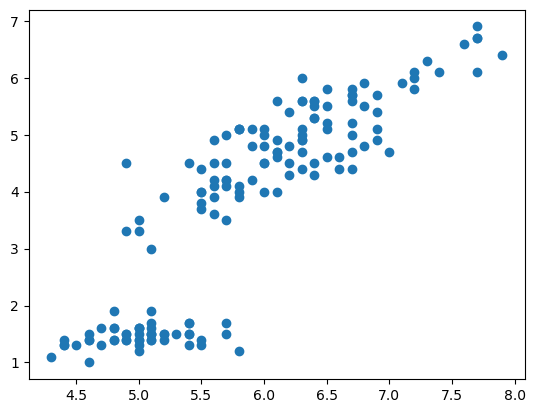

In [24]:
plt.scatter(df['sepal length (cm)'],df['petal length (cm)'])

In [25]:
scaler=MinMaxScaler()

In [51]:
scaler.fit(df[['sepal length (cm)']])
df['sepallength']=scaler.transform(df[['sepal length (cm)']])
scaler.fit(df[['petal length (cm)']])
df['petallength']=scaler.transform(df[['petal length (cm)']])
df.drop(['scalerlength'],axis='columns',inplace=True)

In [60]:
df.drop(['sepal width (cm)','petal width (cm)','sepal length (cm)','petal length (cm)'],axis='columns',inplace=True)

In [61]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['petallength','sepallength']])
y_predicted

C:\Users\Nikita\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nikita\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0])

In [62]:
df['cluster']=y_predicted

In [63]:
df

,petallength,sepallength,cluster
0,0.067797,0.222222,1
1,0.067797,0.166667,1
2,0.050847,0.111111,1
3,0.084746,0.083333,1
4,0.067797,0.194444,1
...,...,...,...
145,0.711864,0.666667,2
146,0.677966,0.555556,0
147,0.711864,0.611111,2
148,0.745763,0.527778,0


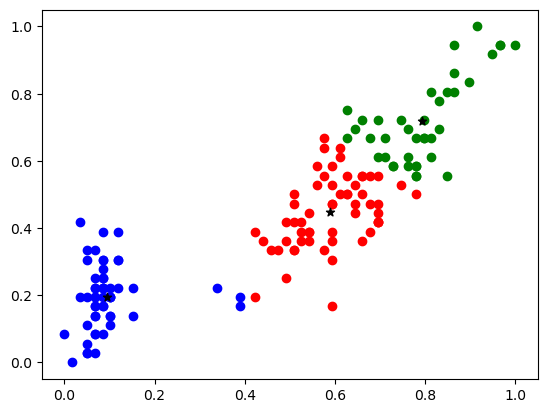

In [71]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.petallength,df1['sepallength'],color='red')
plt.scatter(df2.petallength,df2['sepallength'],color='blue')
plt.scatter(df3.petallength,df3['sepallength'],color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*')

In [73]:
krng=range(1,10)
sse=[]
for k in krng:
    km=KMeans(n_clusters=k)
    km.fit(df[['petallength','sepallength']])
    sse.append(km.inertia_)
sse

C:\Users\Nikita\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nikita\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nikita\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nikita\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[21.22220995841032,
 5.3260673221799,
 2.732898663427129,
 1.7860185767839214,
 1.385234030039852,
 1.0911796223156573,
 0.9162216353611219,
 0.7771996561573913,
 0.6725566386021256]

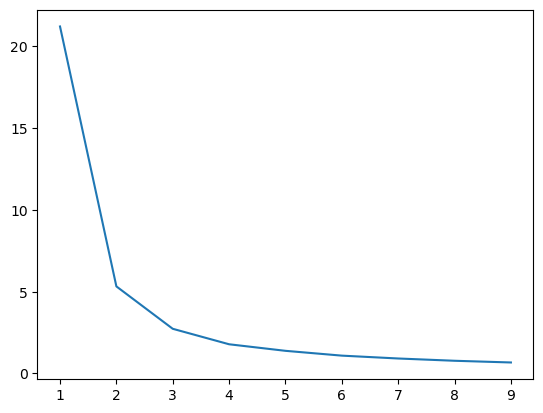

In [74]:
plt.plot(krng,sse)